# TITANIC
Crear un análisis del dataset para crear un modelo de predicción con esos datos.

In [3]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import os

/Users/rodrigobenitogarcia/anaconda3/envs/ml_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
kagglehub.__version__

'0.3.13'

In [5]:
# Download latest version
# path = kagglehub.dataset_download("emanfatima2025/titanic-passenger-survival-prediction-dataset")
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/rodrigobenitogarcia/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1


In [6]:
print(path)

/Users/rodrigobenitogarcia/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1


In [7]:
# Load CSV
csv_file = os.path.join(path, "Titanic-Dataset.csv")
titanic_df = pd.read_csv(csv_file)

In [8]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
print(titanic_df[['Sex','Survived']].head(20))
print(titanic_df.groupby('Sex')['Survived'].value_counts())

       Sex  Survived
0     male         0
1   female         1
2   female         1
3   female         1
4     male         0
5     male         0
6     male         0
7     male         0
8   female         1
9   female         1
10  female         1
11  female         1
12    male         0
13    male         0
14  female         0
15  female         1
16    male         0
17    male         1
18  female         0
19  female         1
Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64


In [10]:
print(titanic_df['Survived'].value_counts(normalize=True))

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


## Data exploration

In [11]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data clean and preparation

### Remove irrelevant columns

In [14]:
titanic_df = titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

### Fill missing values

In [15]:
titanic_clean_df = titanic_df.copy()
titanic_clean_df.fillna({
    'Age': titanic_clean_df['Age'].median(),
    'Fare': titanic_clean_df['Fare'].median(),
    'Embarked': titanic_clean_df['Embarked'].mode()[0]
}, inplace=True)

In [16]:
titanic_clean_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Convert variables from categoric to numeric

In [17]:
titanic_clean_df['Sex'] = titanic_clean_df['Sex'].map({'male': 0, 'female': 1})

In [18]:
titanic_clean_df = pd.get_dummies(titanic_clean_df, columns=['Embarked'], drop_first=True)

In [19]:
titanic_clean_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,False,True
887,1,1,1,19.0,0,0,30.0000,False,True
888,0,3,1,28.0,1,2,23.4500,False,True
889,1,1,0,26.0,0,0,30.0000,False,False


## Data analysis, exploration

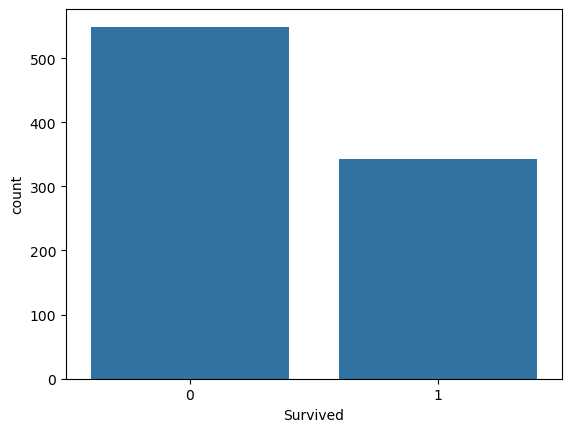

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Survived', data=titanic_clean_df)
plt.show()

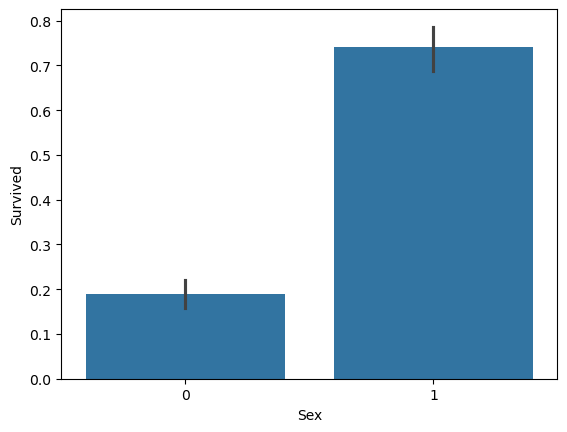

In [21]:
sns.barplot(x='Sex', y='Survived', data=titanic_clean_df)
plt.show()

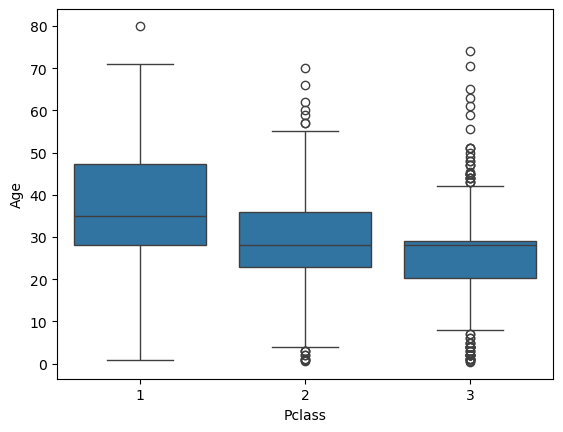

In [22]:
sns.boxplot(x='Pclass', y='Age', data=titanic_clean_df)
plt.show()

## Data preparation

In [23]:
X = titanic_clean_df.drop('Survived', axis=1)
y = titanic_clean_df['Survived']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
titanic_clean_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,False,True
887,1,1,1,19.0,0,0,30.0000,False,True
888,0,3,1,28.0,1,2,23.4500,False,True
889,1,1,0,26.0,0,0,30.0000,False,False


## Data training

### DecisionTreeClassifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7877094972067039
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       105
           1       0.74      0.74      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



### LogisticRegression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Crear el modelo
log_model = LogisticRegression(max_iter=1000, random_state=42)

# Entrenar
log_model.fit(X_train, y_train)

# Predecir
y_pred = log_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.8100558659217877

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



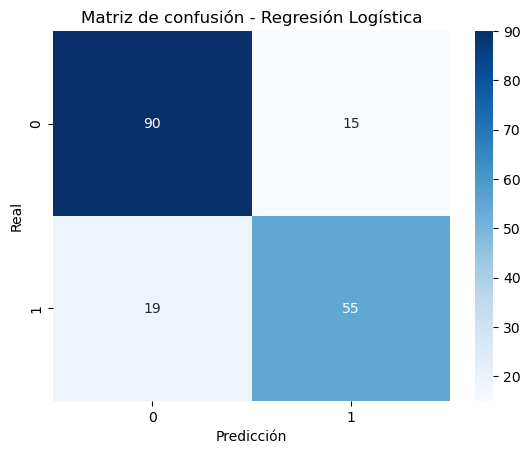

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión - Regresión Logística')
plt.show()

🧩 Resumen visual
| Real / Predicción	| 0 (No sobrevive) | 1 (Sobrevive) |
|---|---|---|
| 0 (No sobrevive) |	✅ True Negative (correcto)	| ❌ False Positive (error) |
| 1 (Sobrevive) |	❌ False Negative (error)	| ✅ True Positive (correcto) |

In [28]:
y_prob = log_model.predict_proba(X_test)[:, 1]
print(y_prob[:10])

[0.1100146  0.22222729 0.13453359 0.88610597 0.73587597 0.93115196
 0.68370223 0.09083565 0.75720303 0.92184036]


In [29]:
coef_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': log_model.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)

print(coef_df)


     Variable  Coeficiente
1         Sex     2.590263
5        Fare     0.002577
2         Age    -0.030547
4       Parch    -0.107630
6  Embarked_Q    -0.112230
3       SibSp    -0.295087
7  Embarked_S    -0.399090
0      Pclass    -0.938105


AUC: 0.883


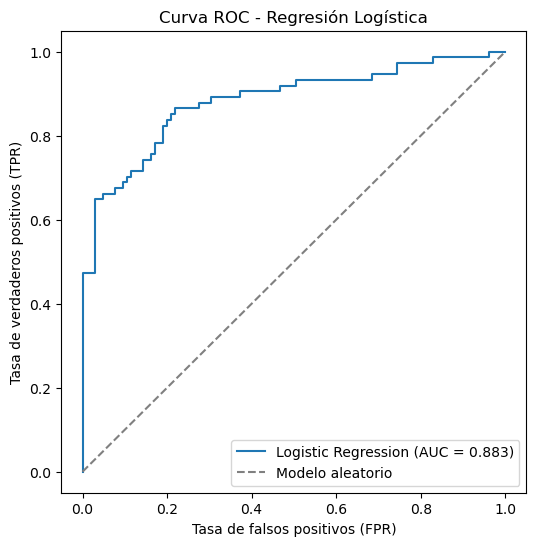

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probabilidades de la clase positiva (sobrevivir)
y_prob = log_model.predict_proba(X_test)[:, 1]

# Calcular FPR, TPR y umbrales
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular el área bajo la curva (AUC)
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc_score:.3f}")

# Graficar la curva ROC
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.3f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray', label='Modelo aleatorio')
plt.title('Curva ROC - Regresión Logística')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.legend()
plt.show()

### RandomForestClassifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Modelo básico
rf_basic = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_basic.fit(X_train, y_train)
# y_pred_rf_basic = rf_basic.predict(X_test)

# Modelo optimizado con hiperparámetros
rf_optimized = RandomForestClassifier(
    n_estimators=100,        # Número de árboles
    max_depth=10,            # Profundidad máxima
    min_samples_split=5,     # Mínimo de muestras para dividir
    min_samples_leaf=2,      # Mínimo de muestras en hoja
    max_features='sqrt',     # Características a considerar por división
    random_state=42,
    n_jobs=-1                # Usar todos los procesadores
)
rf_optimized.fit(X_train, y_train)
y_pred_rf_opt = rf_optimized.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf_opt))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_rf_opt))

Accuracy: 0.8324022346368715

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86       105
           1       0.84      0.73      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



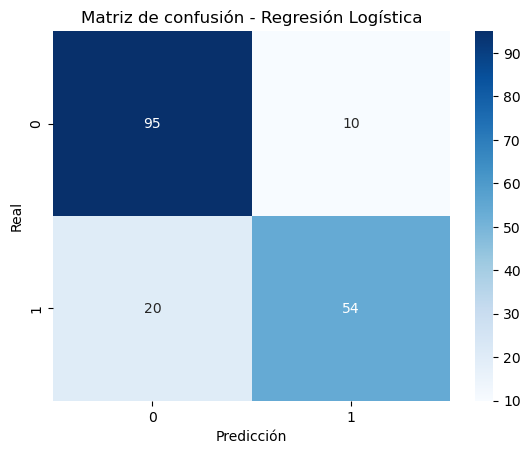

In [32]:
cm = confusion_matrix(y_test, y_pred_rf_opt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión - Regresión Logística')
plt.show()

### XGBClassifier

In [34]:
from xgboost import XGBClassifier

# Modelo básico
xgb_basic = XGBClassifier(
    random_state=42,
    eval_metric='logloss'  # Para evitar warnings
)
# xgb_basic.fit(X_train, y_train)
# y_pred_xgb_basic = xgb_basic.predict(X_test)

# Modelo optimizado con hiperparámetros
xgb_optimized = XGBClassifier(
    n_estimators=100,           # Número de árboles
    max_depth=5,                # Profundidad máxima
    learning_rate=0.1,          # Tasa de aprendizaje
    subsample=0.8,              # Fracción de muestras para cada árbol
    colsample_bytree=0.8,       # Fracción de features para cada árbol
    min_child_weight=1,         # Mínimo peso en nodo hijo
    gamma=0,                    # Reducción mínima de loss para split
    reg_alpha=0,                # Regularización L1
    reg_lambda=1,               # Regularización L2
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)
xgb_optimized.fit(X_train, y_train)
y_pred_xgb_opt = xgb_optimized.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_xgb_opt))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_xgb_opt))

Accuracy: 0.8324022346368715

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179



/Users/rodrigobenitogarcia/anaconda3/envs/ml_env/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [11:35:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


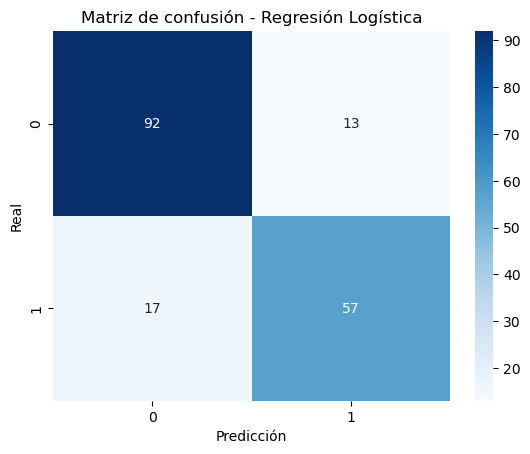

In [35]:
cm = confusion_matrix(y_test, y_pred_xgb_opt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión - Regresión Logística')
plt.show()

💾 7. Guardar el modelo entrenado (opcional)
Usa pickle para guardar tu modelo:
import pickle

with open("modelo_titanic.pkl", "wb") as f:
    pickle.dump(modelo, f)
Y luego cargarlo fácilmente:
with open("modelo_titanic.pkl", "rb") as f:
    modelo = pickle.load(f)